## Created By: Mohammad Sherafati, 2Dec 2018, m.sherafati7@gmail.com

### Import Packages

In [1]:
import scipy as sc
from scipy.misc import comb
import seaborn as sns
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import multiprocessing as mp
import matplotlib.patches as mpatches

### Variable

In [2]:
Set_Age = 100
ensemble = 1

### Function

In [3]:

def Calculate_Energy(i,j,Energy_Adj):

    Sum = 0

    for k in range(len(Energy_Adj)):

        Sum += Energy_Adj[i,k] * Energy_Adj[j,k]

    return (((-Sum) * Energy_Adj[i,j])/sc.special.comb(len(Energy_Adj),3))





def Cal_Ene_Tot(Energy_Adj,Node):
    Ene_Tot = 0

    for i in range(len(Energy_Adj)):
        for j in range(len(Energy_Adj)):
            Ene_Tot += Calculate_Energy(i, j, Energy_Adj)

    return (Ene_Tot) /6

### Main Code

In [4]:
def Mainfunc(Node,age,iterate,ensemble,std):

    Node = Node
    Tot_Time = np.zeros((1, 20000))
    Tot_Ene = np.zeros((1, 20000))
    ensemble = ensemble
    age = age
    iterate = iterate
    Aging = np.ones((Node,Node),dtype=int)
    Age_Imshow = []
    Age_Counter = 1

    '''Main'''


    #ensumble
    for ens in range(ensemble):


        T = 0                                                 #Step
        Time = []                                             #List Step
        Energy_Adj = np.zeros((Node,Node),dtype=int)          #Energy Matrix(staet random)
        Mat_Energy = []                                       #Save Energy in every step
        Age_adj = np.zeros((Node, Node), dtype=int)           #Age Matrix
        Eold = 0

        
        #add Gussian age to nodes
        Random_gaussian = np.random.normal(0,std,(Node,Node))
        Age_gaussian = np.absolute(Random_gaussian - np.mean(Random_gaussian))
        Age_gaussian = np.triu(Age_gaussian, k=1)
        Age_adj = np.copy(Age_gaussian)

        
        
        #Create Random First State
        for i in range(len(Energy_Adj)):
            
            for j in range(i,len(Energy_Adj)):
                Energy_Adj[i, j] = rnd.choice([-1, 1])
                Energy_Adj[j, i] = Energy_Adj[i, j]
#                 Age_adj[i, j] =    Age_gaussian[j]                 #rnd.randint(0,age)
#                 Age_adj[j, i] = Age_adj[i, j]
                Age_adj[j,i] = Age_adj[i,j]
    

        #Zero Diognal

        np.fill_diagonal(Energy_Adj,0)
        np.fill_diagonal(Age_adj,0)
        np.fill_diagonal(Aging, 0)
        Age_adj = Age_adj.round().astype(int)
        
        Age_Imshow.append(Age_adj)
        # for i in range(len(Energy_Adj)):
        #     Energy_Adj[i, i] = 0
        #     Age_adj[i, i] = 0
        #     Aging[i,i] = 0



        Eold = Cal_Ene_Tot(Energy_Adj, Node)
        Copy_Ene_mat = np.copy(Energy_Adj)



    #def func(Node,iterate,Energy_Adj):





        for t in range(iterate):

            Age_network =0
            dE = 0
            Age_network = Age_adj.max()                       #Find Oldest link


            #Change old links with random links
            if Age_network == age:
                dE = 0
                for i in range(Node):
                    for j in range(Node):
                        p = 0
                        p = rnd.choice([-1, 1])

                        if Age_adj[i, j] == age:
                            Energy_Adj[i, j] = p * Energy_Adj[i, j]
                            Energy_Adj[j, i] = p * Energy_Adj[j, i]
                            Copy_Ene_mat[i, j] = Energy_Adj[i, j]
                            Copy_Ene_mat[j, i] = Energy_Adj[j, i]

                            Age_adj[i, j] = 0
                            Age_adj[j, i] = 0

                            newE = Calculate_Energy(i, j, Energy_Adj)
                            oldE = p * Calculate_Energy(i, j, Energy_Adj)
                            dE += newE - oldE

                Eold += dE
                T += 1
                Time.append(T)
                Mat_Energy.append(Eold)




            #Change links with energy properties

            i = rnd.randint(0, Node-1)
            j = rnd.randint(0, Node-1)

            Copy_Ene_mat[i, j] = -Copy_Ene_mat[i, j]
            Copy_Ene_mat[j, i] = -Copy_Ene_mat[j, i]

            dE = 0
            dE = -2 * Calculate_Energy(i, j, Copy_Ene_mat)
            if 0 < dE:

                Energy_Adj[i, j] = -Energy_Adj[i, j]
                Energy_Adj[j, i] = -Energy_Adj[j, i]

                Eold = Eold - dE

                Mat_Energy.append(Eold)
                T +=1
                Time.append(T)

                Age_adj = Age_adj + Aging
                Age_adj[i, j] = 0
                Age_adj[j, i] = 0

            else:
                Copy_Ene_mat[i, j] = Energy_Adj[i, j]
                Copy_Ene_mat[j, i] = Energy_Adj[j, i]
                T += 1
                Time.append(T)
                Mat_Energy.append(Eold)

            if t == 100 * Age_Counter:
                Age_Imshow.append(Age_adj)
                Age_Counter += 1

    return Time, Mat_Energy, Age_adj, Age_Imshow


In [25]:
Fun_Test = Mainfunc(20,900,4000,1,1)

In [26]:
#np.std(Fun_Test[2])
(Fun_Test[2].max())

72

In [27]:
np.std(Fun_Test[2])

24.268229745904417

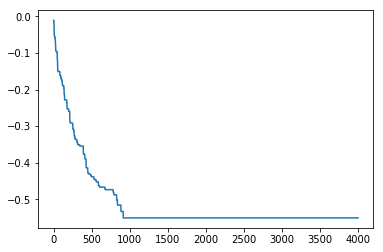

In [28]:
plt.plot(Fun_Test[0],Fun_Test[1])

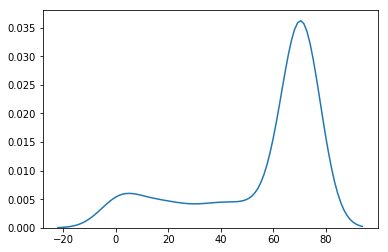

In [29]:
sns.kdeplot(np.reshape(Fun_Test[2],(1,len(Fun_Test[2])**2))[0])

72

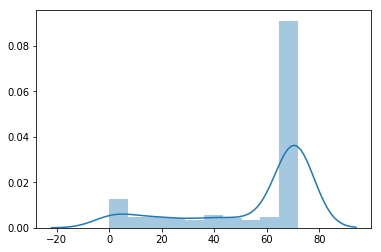

In [30]:
sns.distplot(np.reshape(Fun_Test[2],(1,len(Fun_Test[2])**2))[0])
#np.std(np.reshape(Fun_Test[2],(1,len(Fun_Test[2])**2))[0])
np.reshape(Fun_Test[2],(1,len(Fun_Test[2])**2))[0].max()

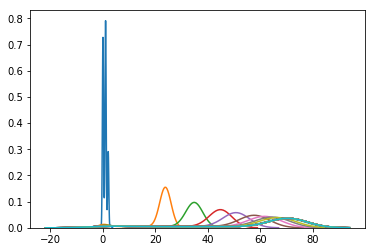

In [31]:
for i in range(len(Fun_Test[3])):
    sns.kdeplot(np.reshape(Fun_Test[3][i],(1,len(Fun_Test[3][i])**2))[0])
#plt.savefig('a')

In [32]:
len(Fun_Test[3])
#sns.kdeplot(np.reshape(Fun_Test[3][-1],(1,len(Fun_Test[3][0])**2))[-1])
for i in range(700,801,1):
    sns.kdeplot(np.reshape(Fun_Test[3][i],(1,len(Fun_Test[3][i])**2))[0])
#plt.savefig('a')

IndexError: list index out of range

In [33]:
Random_gaussian = np.random.normal(0,100,(32,32))
Age_gaussian = np.absolute(Random_gaussian - np.mean(Random_gaussian))
Age_gaussian = np.triu(Age_gaussian, k=1)
Age_adj = np.copy(Age_gaussian)


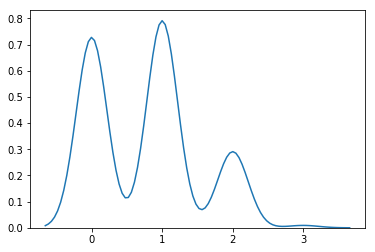

In [34]:
sns.kdeplot(np.reshape(Fun_Test[3][0],(1,len(Fun_Test[3][0])**2))[0])


In [15]:
np.reshape(Fun_Test[3][0],(1,len(Fun_Test[3][0])**2))[0].max()

321

In [37]:
Mean_Ene = []
Thresh = []
for i in range(1,121,1):
    Fun_Test1 = Mainfunc(20,i,5000,1,1)
    Mean_Ene.append(np.mean(Fun_Test1[1]))
    Thresh.append(i/sc.special.comb(20,2))
    

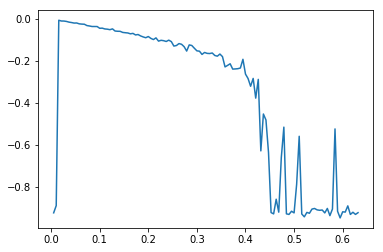

In [38]:
plt.plot(Thresh,Mean_Ene)

In [39]:
np.savetxt('T20.txt',Thresh)
np.savetxt('E20.txt',Mean_Ene)

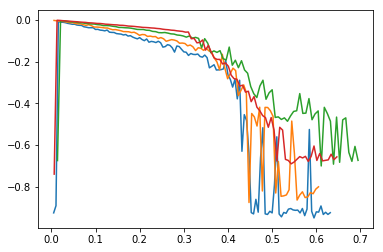

In [44]:
List_Nom = [20,32,64,100]
for i in List_Nom :
    Mean_Func = np.loadtxt('/home/mohammad/Documents/Thesis/Aged-Network/Results/Transition Point/E'+str(i)+'.txt')
    Thres = np.loadtxt('/home/mohammad/Documents/Thesis/Aged-Network/Results/Transition Point/T'+str(i)+'.txt')
    plt.plot(Thres,Mean_Func)
    